## Importando Bibliotecas

In [13]:
import os
import re
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

## Carregando a base de dados

In [6]:
data = pd.read_csv('datasets/loan.csv')

In [8]:
# Listando as 5 primeiras linhas do dateset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
# Verificando os tipos de dados de cada coluna do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


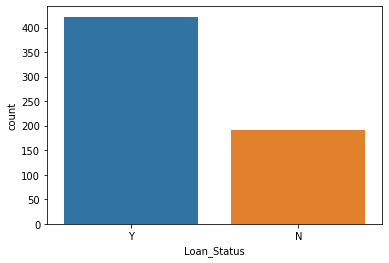

In [21]:
# Exibindo a quantidade de cada classe
sns.countplot(data.Loan_Status)

In [10]:
data2 = data[data.Loan_Status=='Y'].sample(200)

In [11]:
data = data2.append(data[data.Loan_Status=='N'].sample(192))

In [12]:
data.Loan_Status.value_counts()

Y    200
N    192
Name: Loan_Status, dtype: int64

## Checando Missing Values

In [13]:
data2.isnull().sum()

Loan_ID               0
Gender                5
Married               2
Dependents            4
Education             0
Self_Employed         9
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            3
Loan_Amount_Term      2
Credit_History       18
Property_Area         0
Loan_Status           0
dtype: int64

Preechendo Missing Values:

- `Dependents`: Assumindo o valor majoritário da coluna.
- `Self_Employed`: Assumindo o valor majoritário da coluna.
- `Loan_Amount_Term`: Preenchendo com o valor médio da coluna.
- `Credit_History`: Assumindo o valor majoritário da coluna.
- `Married`: Assumindo o valor majoritário da coluna.
- `Gender`: Assumindo o valor majoritário da coluna.

In [14]:
data['Gender'] = data['Gender'].fillna('Male')

In [15]:
data['Married'] = data['Married'].fillna('No')

In [16]:
data['Dependents'] = data['Dependents'].fillna('0')

In [17]:
data['Self_Employed'] = data['Self_Employed'].fillna('No')

In [18]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [19]:
data['Credit_History'] = data['Credit_History'].fillna(1.0)

In [20]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [21]:
data.Credit_History.value_counts()

1.0    306
0.0     86
Name: Credit_History, dtype: int64

### Checando novamente Missing Values

In [22]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Transformando dados categóricos**

Várias colunas do dataframe são categóricas, precisamos transforma-las, são elas: `Gender`, `Married`, `Education`, `Self_Employed` & `Property_Area` columns.

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
gender_values = {'Female' : 0, 'Male' : 1} 
married_values = {'No' : 0, 'Yes' : 1}
education_values = {'Graduate' : 0, 'Not Graduate' : 1}
employed_values = {'No' : 0, 'Yes' : 1}
dependent_values = {'3+': 3, '0': 0, '2': 2, '1': 1}
loan_values = {'Y':1,'N':0}
data.replace({'Gender': gender_values,
                 'Married': married_values, 
                 'Education': education_values,
                 'Self_Employed': employed_values, 
                 'Dependents': dependent_values,
                 'Loan_Status': loan_values
                }, inplace=True)

In [25]:
data.drop(['Loan_ID','CoapplicantIncome','Loan_Amount_Term','Credit_History','Property_Area'],axis=1,inplace=True)

In [26]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Status
529,1,0,0,1,0,6783,130.0,1
309,1,1,2,1,0,7667,185.0,1
246,1,1,2,0,0,9703,112.0,1
200,1,1,1,1,0,2600,90.0,1
182,1,1,0,0,0,4600,73.0,1


Selecionando o melhor classificador através de Pipeline e GridSearchCV

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [28]:
pipe_random_forest = Pipeline([
        ('scl', StandardScaler()),
        
        ('clf', RandomForestClassifier())
        ]
)

In [29]:
pipe_svm = Pipeline([
        ('scl', StandardScaler()),
        ('clf', svm.SVC())
        ]
)

In [30]:
pipe_knn = Pipeline([
        ('scl', StandardScaler()),
        ('clf', KNeighborsClassifier())
        ]
)

#### Valores para Grid

In [31]:
valores = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [32]:
grid_params_rf = [{
    'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_leaf': valores,
    'clf__max_depth': valores,
    'clf__min_samples_split': valores[1:]
}]

In [33]:
grid_params_svm = [{
    'clf__kernel': ['linear', 'rbf'], 
    'clf__C': valores
}]

In [34]:
grid_params_knn = [{
    'clf__n_neighbors': valores,
}]

#### Construindo GridSearch

In [35]:
gs_rf = GridSearchCV(
    estimator=pipe_random_forest,
    param_grid=grid_params_rf,
    scoring='accuracy',
    cv=10 
)

In [36]:
gs_svm = GridSearchCV(
    estimator=pipe_svm,
    param_grid=grid_params_svm,
    scoring='accuracy',
    cv=10,
)

In [37]:
gs_knn = GridSearchCV(
    estimator=pipe_knn,
    param_grid=grid_params_knn,
    scoring='accuracy',
    cv=10,
)

In [38]:
X_train = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

#### Computando o GridSearch para Random Forest

In [39]:
gs_rf.fit(X_train,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                

#### Melhores parametros e scoring

In [40]:
print('Melhores parâmetros: %s' % gs_rf.best_params_)
print('Melhores Acurácia: %.3f' % gs_rf.best_score_)

Melhores parâmetros: {'clf__criterion': 'entropy', 'clf__max_depth': 8, 'clf__min_samples_leaf': 7, 'clf__min_samples_split': 6}
Melhores Acurácia: 0.566


#### Computando o GridSearch para SVM

In [41]:
gs_svm.fit(X_train,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, 

#### Melhores parametros e scoring

In [42]:
print('Melhores parâmetros: %s' % gs_svm.best_params_)
print('Melhores Acurácia: %.3f' % gs_svm.best_score_)

Melhores parâmetros: {'clf__C': 1, 'clf__kernel': 'linear'}
Melhores Acurácia: 0.510


#### Computando o GridSearch para KNN

In [43]:
gs_knn.fit(X_train,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             

#### Melhores parametros e scoring

In [44]:
print('Melhores parâmetros: %s' % gs_knn.best_params_)
print('Melhores Acurácia: %.3f' % gs_knn.best_score_)

Melhores parâmetros: {'clf__n_neighbors': 9}
Melhores Acurácia: 0.533


### Métricas de Validação ###

In [45]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [46]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_train, y)

In [47]:
print (pd.crosstab(y_teste, gs_rf.predict(X_teste), rownames=['Real'], colnames=['Predito'], margins=True), '')

Predito   0   1  All
Real                
0        30  15   45
1         9  44   53
All      39  59   98 


In [48]:
print (metrics.classification_report(y_teste,gs_rf.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        45
           1       0.75      0.83      0.79        53

    accuracy                           0.76        98
   macro avg       0.76      0.75      0.75        98
weighted avg       0.76      0.76      0.75        98



### Persistindo o modelo de Machine Learning para o disco. ###

In [64]:
from sklearn.externals import joblib

#### Persistindo o melhor modelo em disco.

In [49]:
joblib.dump(gs_rf, 'model.pkl')

['model.pkl']

#### Listando os arquivos em disco.

In [50]:
!dir

 O volume na unidade C não tem nome.
 O Número de Série do Volume é 269F-F190

 Pasta de C:\Users\JOSE\Documents\DataScienceZero\Modulo 09 - Machine Learning em Producao

23/03/2020  16:58    <DIR>          .
23/03/2020  16:58    <DIR>          ..
23/03/2020  16:32    <DIR>          .ipynb_checkpoints
23/03/2020  16:17               168 array.npy
23/03/2020  13:14    <DIR>          cap06-ml-producao-materiais-apoio
23/03/2020  16:11                19 lista.pkl
23/03/2020  16:21               144 lista2.npy
23/03/2020  16:27               210 lista3.gz
23/03/2020  16:27               233 lista3.joblib
23/03/2020  16:58           624.428 model.pkl
23/03/2020  16:30            11.488 Persistindo objetos em Disco.ipynb
23/03/2020  16:58            37.176 persistindo-modelo-machine-learning-disco-Copy1.ipynb
               8 arquivo(s)        673.866 bytes
               4 pasta(s)   84.682.686.464 bytes disponíveis


#### Carregando o modelo a partir do disco para a memória.

In [52]:
model = joblib.load('model.pkl')

In [53]:
print("Atributos do Modelo:\n\nClasses:{}\nEstimator:{}".format(model.classes_,model.estimator))

Atributos do Modelo:

Classes:[0 1]
Estimator:Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
  

**Verificando o Dataset final gerado.**

In [54]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount
529,1,0,0,1,0,6783,130.0
309,1,1,2,1,0,7667,185.0
246,1,1,2,0,0,9703,112.0
200,1,1,1,1,0,2600,90.0
182,1,1,0,0,0,4600,73.0


**Teste de Classificação.**

In [56]:
teste = np.array([[1,1,3,0,0,9504,275.0]])

In [57]:
model.predict(teste)

array([1], dtype=int64)

**Probabilidades de Classes.**

In [58]:
model.predict_proba(teste)

array([[0.39334325, 0.60665675]])